<a href="https://colab.research.google.com/github/sam-thurman/asl_alphabet_image_classification/blob/master/notebooks/model_create/classifier_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Routine code for connecting (mounting) to Google Drive

In [0]:
# mount google drive
from google.colab import drive
# directory for drive to serve files from
drive.mount('/content/drive')
# verify it's you

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# where we are
    # Google Drive gives us some nice sample data to play with for learning and exploring new concepts
%ls

drive/  sample_data/


Import helper scripts

In [0]:
import sys
# append Google Drive repository-specific path to system path
    # should be the path to the repository containing the load_model and model_create script files in Drive
    # for reading / writing to here using bash
sys.path.append('/content/drive/My\ Drive/asl_alphabet_image_classification/')


In [0]:
%cd drive/My\ Drive/asl_alphabet_image_classification/
from load_model import load_saved_model
from model_create import *

/content/drive/My Drive/asl_alphabet_image_classification


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


running


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Init train and validation generators

In [0]:
# check path to data
%ls

augment_2_exploratory.ipynb  InceptionV3.ipynb    notebooks/
augment_exploratory.ipynb    __init__.py          opencv/
data/                        LICENSE              __pycache__/
edge_exploratory.ipynb       load_model.py        README.md
exploratory_1.ipynb          model_create.ipynb   test.txt
exploratory_2.ipynb          model_create.py      unet_model3.ipynb
exploratory_3.ipynb          model_explain.ipynb  update_InceptionV3.ipynb
file_import.ipynb            models/              write_test.txt
flask/                       model_test.ipynb
import_test.py               notebook_helpers.py


In [0]:
train_generator = create_master_train_generator('../data/asl_alphabet_train')

Found 87125 images belonging to 29 classes.


In [0]:
val_generator = create_val_generator('../data/asl_alphabet_validation')

Found 30 images belonging to 29 classes.


Check edger output

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

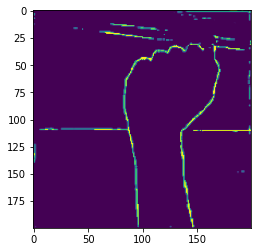

In [0]:
plt.imshow(array_to_img(val_generator[0][0][0]))
# this should appear as a single fist-like shape in the middle of the frame, with 3 lines in the background
    # if this is not what you see, make sure you are running this notebook in the 
    # recommended workflow (see project README)

Just what the code says... compile, train and save the model

In [0]:
compile_train_save_model(train_generator=train_generator, val_generator=val_generator, num_epochs=10, model_name='model33')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120000)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                148480029 
Total params: 148,481,309
Trainable params: 148,481,309
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 138/2723 [>.............................] - ETA: 8:44:09 - loss: 974.5558 - accuracy: 0.0145

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2626 could not be retrieved. It could be because a worker has died.
  UserWarning)


 188/2723 [=>............................] - ETA: 8:41:49 - loss: 1024.6905 - accuracy: 0.0160

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2323 could not be retrieved. It could be because a worker has died.
  UserWarning)


 335/2723 [==>...........................] - ETA: 8:12:04 - loss: 1144.7282 - accuracy: 0.0239

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 441 could not be retrieved. It could be because a worker has died.
  UserWarning)


 360/2723 [==>...........................] - ETA: 8:09:07 - loss: 1142.3104 - accuracy: 0.0278

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 652 could not be retrieved. It could be because a worker has died.
  UserWarning)


 362/2723 [==>...........................] - ETA: 8:11:55 - loss: 1144.4397 - accuracy: 0.0276

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 469 could not be retrieved. It could be because a worker has died.
  UserWarning)


 394/2723 [===>..........................] - ETA: 8:10:22 - loss: 1148.3011 - accuracy: 0.0305

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 956 could not be retrieved. It could be because a worker has died.
  UserWarning)


 395/2723 [===>..........................] - ETA: 8:12:17 - loss: 1146.4164 - accuracy: 0.0304

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1249 could not be retrieved. It could be because a worker has died.
  UserWarning)


 494/2723 [====>.........................] - ETA: 7:53:04 - loss: 1294.2059 - accuracy: 0.0364

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2060 could not be retrieved. It could be because a worker has died.
  UserWarning)


 498/2723 [====>.........................] - ETA: 7:54:41 - loss: 1295.1046 - accuracy: 0.0361

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2071 could not be retrieved. It could be because a worker has died.
  UserWarning)


 528/2723 [====>.........................] - ETA: 7:51:35 - loss: 1301.7863 - accuracy: 0.0341

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1775 could not be retrieved. It could be because a worker has died.
  UserWarning)


 562/2723 [=====>........................] - ETA: 7:45:18 - loss: 1325.0650 - accuracy: 0.0338

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2242 could not be retrieved. It could be because a worker has died.
  UserWarning)


 580/2723 [=====>........................] - ETA: 7:42:28 - loss: 1333.2010 - accuracy: 0.0328

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 616 could not be retrieved. It could be because a worker has died.
  UserWarning)


 593/2723 [=====>........................] - ETA: 7:41:12 - loss: 1343.1035 - accuracy: 0.0337

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 381 could not be retrieved. It could be because a worker has died.
  UserWarning)


 602/2723 [=====>........................] - ETA: 7:40:29 - loss: 1344.4617 - accuracy: 0.0332

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1696 could not be retrieved. It could be because a worker has died.
  UserWarning)


 613/2723 [=====>........................] - ETA: 7:39:43 - loss: 1342.8061 - accuracy: 0.0326

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 909 could not be retrieved. It could be because a worker has died.
  UserWarning)


 623/2723 [=====>........................] - ETA: 7:38:32 - loss: 1340.1470 - accuracy: 0.0337

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 541 could not be retrieved. It could be because a worker has died.
  UserWarning)


 643/2723 [======>.......................] - ETA: 7:34:43 - loss: 1349.5607 - accuracy: 0.0327

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 308 could not be retrieved. It could be because a worker has died.
  UserWarning)


 654/2723 [======>.......................] - ETA: 7:33:26 - loss: 1354.3444 - accuracy: 0.0321

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2160 could not be retrieved. It could be because a worker has died.
  UserWarning)


 658/2723 [======>.......................] - ETA: 7:33:22 - loss: 1349.9597 - accuracy: 0.0319

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1297 could not be retrieved. It could be because a worker has died.
  UserWarning)


 659/2723 [======>.......................] - ETA: 7:35:53 - loss: 1349.2455 - accuracy: 0.0319

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2321 could not be retrieved. It could be because a worker has died.
  UserWarning)


 665/2723 [======>.......................] - ETA: 7:36:27 - loss: 1355.7876 - accuracy: 0.0316

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2135 could not be retrieved. It could be because a worker has died.
  UserWarning)


 690/2723 [======>.......................] - ETA: 7:32:30 - loss: 1357.0576 - accuracy: 0.0319

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 687 could not be retrieved. It could be because a worker has died.
  UserWarning)


 693/2723 [======>.......................] - ETA: 7:33:59 - loss: 1359.5601 - accuracy: 0.0317

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1002 could not be retrieved. It could be because a worker has died.
  UserWarning)


 701/2723 [======>.......................] - ETA: 7:35:05 - loss: 1370.8162 - accuracy: 0.0314

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2144 could not be retrieved. It could be because a worker has died.
  UserWarning)


 709/2723 [======>.......................] - ETA: 7:34:23 - loss: 1366.9103 - accuracy: 0.0310

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1798 could not be retrieved. It could be because a worker has died.
  UserWarning)


 735/2723 [=======>......................] - ETA: 7:29:05 - loss: 1361.7558 - accuracy: 0.0313

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1220 could not be retrieved. It could be because a worker has died.
  UserWarning)


 810/2723 [=======>......................] - ETA: 7:10:37 - loss: 1346.9191 - accuracy: 0.0336

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 610 could not be retrieved. It could be because a worker has died.
  UserWarning)


 823/2723 [========>.....................] - ETA: 7:07:56 - loss: 1347.3051 - accuracy: 0.0342

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2389 could not be retrieved. It could be because a worker has died.
  UserWarning)


 834/2723 [========>.....................] - ETA: 7:06:09 - loss: 1346.7825 - accuracy: 0.0338

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2137 could not be retrieved. It could be because a worker has died.
  UserWarning)


 841/2723 [========>.....................] - ETA: 7:05:56 - loss: 1347.0908 - accuracy: 0.0335

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1144 could not be retrieved. It could be because a worker has died.
  UserWarning)


 846/2723 [========>.....................] - ETA: 7:05:26 - loss: 1343.8868 - accuracy: 0.0333

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2117 could not be retrieved. It could be because a worker has died.
  UserWarning)


 878/2723 [========>.....................] - ETA: 6:59:59 - loss: 1337.4647 - accuracy: 0.0321

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2111 could not be retrieved. It could be because a worker has died.
  UserWarning)


 884/2723 [========>.....................] - ETA: 7:00:28 - loss: 1336.4588 - accuracy: 0.0319

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1099 could not be retrieved. It could be because a worker has died.
  UserWarning)


 912/2723 [=========>....................] - ETA: 6:55:33 - loss: 1332.1770 - accuracy: 0.0309

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1979 could not be retrieved. It could be because a worker has died.
  UserWarning)


 951/2723 [=========>....................] - ETA: 6:47:02 - loss: 1322.3985 - accuracy: 0.0328

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2410 could not be retrieved. It could be because a worker has died.
  UserWarning)


 953/2723 [=========>....................] - ETA: 6:47:16 - loss: 1323.8040 - accuracy: 0.0327

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 520 could not be retrieved. It could be because a worker has died.
  UserWarning)


 963/2723 [=========>....................] - ETA: 6:46:40 - loss: 1315.4199 - accuracy: 0.0324

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2258 could not be retrieved. It could be because a worker has died.
  UserWarning)


 964/2723 [=========>....................] - ETA: 6:47:06 - loss: 1314.9512 - accuracy: 0.0324

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 633 could not be retrieved. It could be because a worker has died.
  UserWarning)


 969/2723 [=========>....................] - ETA: 6:46:34 - loss: 1311.6873 - accuracy: 0.0322

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1009 could not be retrieved. It could be because a worker has died.
  UserWarning)


 971/2723 [=========>....................] - ETA: 6:46:33 - loss: 1310.4595 - accuracy: 0.0321

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 92 could not be retrieved. It could be because a worker has died.
  UserWarning)


 972/2723 [=========>....................] - ETA: 6:46:49 - loss: 1310.0287 - accuracy: 0.0321

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 424 could not be retrieved. It could be because a worker has died.
  UserWarning)


 973/2723 [=========>....................] - ETA: 6:47:09 - loss: 1308.7514 - accuracy: 0.0321

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 608 could not be retrieved. It could be because a worker has died.
  UserWarning)


 977/2723 [=========>....................] - ETA: 6:46:51 - loss: 1304.8382 - accuracy: 0.0319

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


 993/2723 [=========>....................] - ETA: 6:43:44 - loss: 1299.0415 - accuracy: 0.0314

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2500 could not be retrieved. It could be because a worker has died.
  UserWarning)


 997/2723 [=========>....................] - ETA: 6:43:22 - loss: 1298.8171 - accuracy: 0.0313

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2027 could not be retrieved. It could be because a worker has died.
  UserWarning)


1043/2723 [==========>...................] - ETA: 6:33:11 - loss: 1284.1131 - accuracy: 0.0309

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2305 could not be retrieved. It could be because a worker has died.
  UserWarning)


2487/2723 [==========================>...] - ETA: 50:20 - loss: 1169.8492 - accuracy: 0.0386

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 640 could not be retrieved. It could be because a worker has died.
  UserWarning)


2518/2723 [==========================>...] - ETA: 43:46 - loss: 1168.2647 - accuracy: 0.0385

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1745 could not be retrieved. It could be because a worker has died.
  UserWarning)


2520/2723 [==========================>...] - ETA: 43:22 - loss: 1167.9183 - accuracy: 0.0385

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2095 could not be retrieved. It could be because a worker has died.
  UserWarning)


2535/2723 [==========================>...] - ETA: 40:11 - loss: 1169.7940 - accuracy: 0.0383

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2044 could not be retrieved. It could be because a worker has died.
  UserWarning)


2591/2723 [===========================>..] - ETA: 28:12 - loss: 1167.1311 - accuracy: 0.0393

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1601 could not be retrieved. It could be because a worker has died.
  UserWarning)


2642/2723 [============================>.] - ETA: 17:19 - loss: 1165.8275 - accuracy: 0.0400

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2441 could not be retrieved. It could be because a worker has died.
  UserWarning)


2693/2723 [============================>.] - ETA: 6:25 - loss: 1159.9111 - accuracy: 0.0414

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


2710/2723 [============================>.] - ETA: 2:46 - loss: 1163.1504 - accuracy: 0.0415

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1391 could not be retrieved. It could be because a worker has died.
  UserWarning)


2723/2723 [==============================] - 34979s 13s/step - loss: 1162.7951 - accuracy: 0.0413 - val_loss: 616.3463 - val_accuracy: 0.1000
Epoch 2/10
2723/2723 [==============================] - 1841s 676ms/step - loss: 1173.1597 - accuracy: 0.1778 - val_loss: 675.1357 - val_accuracy: 0.4000
Epoch 3/10
2723/2723 [==============================] - 1854s 681ms/step - loss: 1174.7501 - accuracy: 0.3354 - val_loss: 321.5241 - val_accuracy: 0.7333
Epoch 4/10
2723/2723 [==============================] - 1895s 696ms/step - loss: 1048.8491 - accuracy: 0.4578 - val_loss: 133.1303 - val_accuracy: 0.7333
Epoch 5/10
2723/2723 [==============================] - 1887s 693ms/step - loss: 1120.4268 - accuracy: 0.5152 - val_loss: 340.7180 - val_accuracy: 0.7667
Epoch 6/10
2723/2723 [==============================] - 1910s 702ms/step - loss: 1000.8814 - accuracy: 0.5945 - val_loss: 184.0945 - val_accuracy: 0.8333
Epoch 7/10
2723/2723 [==============================] - 1856s 682ms/step - loss: 981.006